In [1]:
import numpy as np
import matplotlib.pyplot as plt

Professor das TPs: Diogo Pernes

dpc@fe.up.pt

diogo.pernes@fe.up.pt

Sala i117

2. K-Means Algorithm

In [10]:
import additional_stuff

X, y = additional_stuff.simulated_dataset()

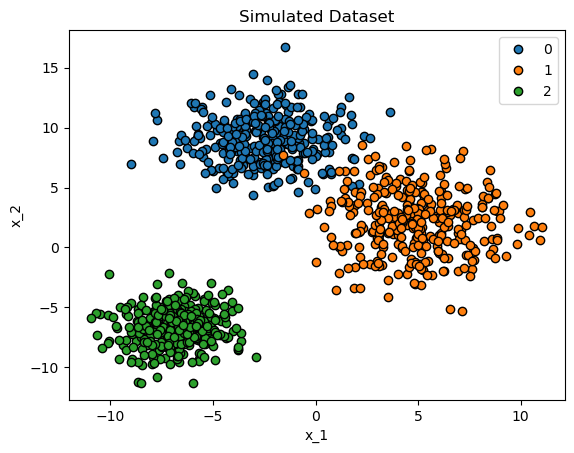

In [18]:
classes = np.unique(y)
for label in classes:
    index, = np.where(y == label)
    plt.plot(X[index, 0], X[index, 1],
             ls="none", marker="o", mec="k", label=label)
plt.title("Simulated Dataset")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend()

In [30]:
def k_means(X, k, max_iter=1000):
    # Initialize centroids
    n, d = X.shape
    centroids = np.random.randn(k, d) 
    assignments = -np.ones(n)
    assignments_old = assignments.copy()

    for t in range(max_iter):
        # Associate a cluster to each datapoint
        diff = X.reshape(n, 1, d) - centroids.reshape(1, k, d)
        dists = np.linalg.norm(diff, axis=-1) # (n, k)
        assignments = np.argmin(dists, axis=-1)

        # Check for convergence
        if np.array_equal(assignments, assignments_old):
            break
        assignments_old = assignments.copy()

        # Update centroids
        for j in range(k):
            Xj = X[assignments == j]
            centroids[j] = np.mean(Xj, axis=0)
    
    return assignments, centroids

    

In [31]:
assignments, centroids = k_means(X, 3)

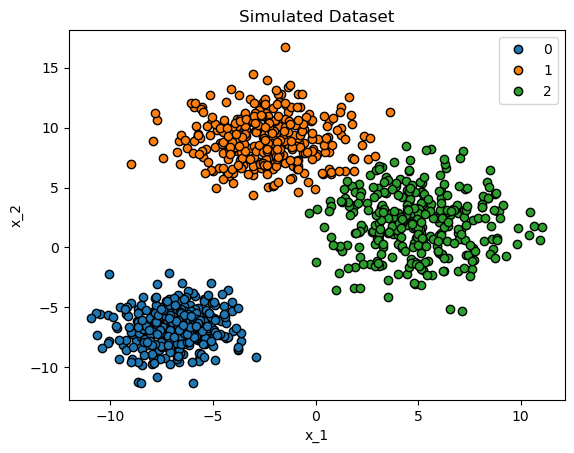

In [32]:
classes = np.unique(assignments)
for label in classes:
    index, = np.where(assignments == label)
    plt.plot(X[index, 0], X[index, 1],
             ls="none", marker="o", mec="k", label=label)
plt.title("Simulated Dataset")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend()